## 描述

- 这里实现两个特征变量的逻辑回归算法的损失函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

### 生成模拟数据
- 模拟数据的内在模式是 
$ y =
\begin{cases}
1 \quad & x_1 + x_2 \ge 0 \\
0 \quad & x_1 + x_2 \lt 0
\end{cases}
$

- 可以通过sigmod()函数及四舍五入来实现： $\normalsize sigm(z) = \frac{1}{1 + e^{-z}}$
- 此函数的图像如下：

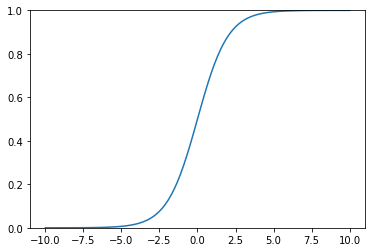

In [2]:
z = np.linspace(-10, 10, 100)
sigm = 1./(1. + np.exp(-z))
_ = plt.plot(z, sigm)
_ = plt.ylim(0, 1)

- 加入随机噪声就可以得到我们的模拟数据

In [3]:
np.random.seed(20180823)

m = 100   # 样本量
xlim = 4  # 数据采样范围

x0 = np.ones((m, 1))
x1 = np.random.rand(m, 1)*xlim*2 - xlim
x2 = np.random.rand(m, 1)*xlim*2 - xlim
ty = 1./(1. + np.exp(-(x1 + x2))) + np.random.randn(m, 1)*0.2
y = np.round(ty)

- 可以把图作出来，直线代表数据的内在模式，也就是红绿两种点的分界线
- 分界线的方程是：$\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 = 0$ 
- 其中：$\theta_0 = 0 ,\; \theta_1 = 1 ,\; \theta_2 = 1$, 我们之后的算法就是要得到这三个参数的值

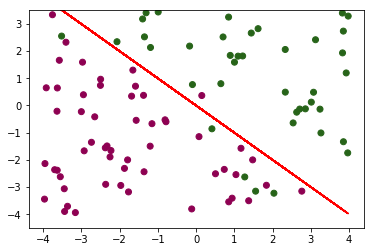

In [4]:
_ = plt.scatter(x1, x2, c=y, cmap='PiYG')
_ = plt.plot(x1, -x1, 'r')
_ = plt.ylim(-4.5, 3.5)

### 假设函数
- 我们的假设函数为：$$\normalsize h_\theta(x^{(i)}) = \frac{1}{1 + e^{-x^{(i)}\theta}}$$

### 损失函数和梯度
- 损失函数为： $$\large J(\theta) = \frac{1}{m} \sum_{i=1}^{m} Cost \left(h_\theta(x^{(i)}),\; y^{(i)}\right)$$
- 其中 
$$ \large Cost(\; h_\theta(x^{(i)}),\; y^{(i)}\;) = 
\begin{cases}
-log(h_\theta(x^{(i)})) \quad & y^{(i)} = 1 \\
-log(1 - h_\theta(x^{(i)})) \quad & y^{(i)} = 0
\end{cases}
$$
- 因为$ y^{(i)}$ 只能为1或者0，所以可以合并：
$$\large J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left [y^{(i)}log(h_\theta(x^{(i)})) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))\right ]$$

### 梯度和梯度下降
- 梯度：
$$\large \frac {\partial}{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left [h_\theta(x^{(i)}) - y^{(i)}\right ] x_j^{(i)}$$
- 梯度下降
$$\begin{aligned}
\mbox{Repeat : }&\\
\large & \theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta)
\end{aligned}$$

### 向量化
- 生成特征矩阵$X$：$$X_{m\times 3} = (x_0, x_1, x_2), \quad x_0 = ({1, 1, \dots 1})^T \quad x_0\mbox{ 's size is m}$$
- 假设函数：$$\normalsize h_\theta(X) = \frac{1}{1 + e^{-X\theta}}$$
- 损失函数：
$$\large J(\theta) = -\frac{1}{m} \left [y^Tlog(h_\theta(X)) + (1 - y^T)log(1 - h_\theta(X))\right ]$$
- 梯度： 
$$\large \nabla J(\theta) = \frac{1}{m} X^T [h_\theta(X) - y] $$
- 梯度下降：
$$\large \theta := \theta - \alpha \nabla J(\theta) $$

### 根据向量化之后的数学式构建我们的函数

In [5]:
# 假设函数
def h_theta(X, theta):
    return 1./(1. + np.exp(- np.dot(X, theta)))

# 损失函数
def loss_func(X, theta, y):
    y1 = np.log(h_theta(X, theta))
    y0 = np.log(1. - h_theta(X, theta))
    return -1./m * (np.dot(y.T, y1) + np.dot((1. - y.T), y0))
    
# 梯度函数
def grad_func(X, theta, y):
    return 1./m * np.dot(X.T, h_theta(X, theta) - y)

### 使用梯度下降算法进行训练

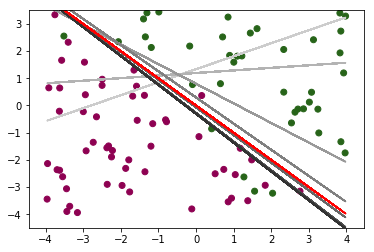

In [6]:
np.random.seed(20180823)
# 设置学习率和收敛开关
alpha = 0.1
stop = 1e-6

i = 1
index = 1
c = np.array([0.8, 0.8, 0.8])   # 设置颜色，颜色逐渐加深

theta = np.random.randn(3, 1)
X = np.hstack((x0, x1, x2))
grad = grad_func(X, theta, y)
while not np.all(abs(grad) <= stop):
    theta = theta - alpha*grad
    grad = grad_func(X, theta, y)
    
    # 作出学习过程
    i = i+1
    if i%index == 0:
        yline = -theta[0]/theta[2] - theta[1]/theta[2]*x1
        _ = plt.plot(x1, yline, color=c)
        c = c - 0.1
        index = index*4

_ = plt.scatter(x1, x2, c=y, cmap='PiYG')
_ = plt.plot(x1, -x1, 'r')
_ = plt.ylim(-4.5, 3.5)

- 可以看到，随着训练迭代的加深，我们的直线（灰色—黑色）和数据的内在模式（红色）越来越接近，说明实现了逻辑分类的功能

## 测试预测性能

- 和模拟数据一样的模式生成测试数据，注意修改随机种子的值，这样说明得到的数据和训练数据是同一个模式，但是是全新的数据

In [7]:
# 测试数据
np.random.seed(2018082302) #修改随机种子

test_x0 = np.ones((m, 1))
test_x1 = np.random.rand(m, 1)*xlim*2 - xlim
test_x2 = np.random.rand(m, 1)*xlim*2 - xlim
test_ty = 1./(1. + np.exp(-(test_x1 + test_x2))) + np.random.randn(m, 1)*0.2
test_y = np.round(test_ty)

- 使用我们训练出来的参数向量theta进行预测
- 并输出正确率，正确率达0.95，说明我们的性能还是可以的 ~~

In [8]:
test_X = np.hstack((test_x0, test_x1, test_x2))
y_ = h_theta(test_X, theta)
pre_y = np.round(y_)

acc = sum(int(a == b) for a, b in zip(pre_y, test_y))/m
acc

0.95